In [1]:
%load_ext autoreload
%autoreload 2
main_dir = r'../../..'
data_path = main_dir+'/data'
import sys
sys.path.append(main_dir)
from typing import List, Set, Dict, Optional, Any, Tuple, Type, Union

from BayDS.lib.pipeline import *
from BayDS.lib.io import *
import os


In [3]:
data_dir = f'e:/kaggle/05-LabelEncoded-last'
p = Pipeline(working_folder=f'{main_dir}/Snapshots/1/catboost_last_dynamics')

p.add_node(LoaderNode, None, 'data',
           params={
               'input_directory': data_dir,
               'file': 'label_encoded_data.pkl'
           })
p.add_node(LoaderNode, None, 'oof',
           params={
               'input_directory': main_dir+'/data/sub',
               'file': 'oof_catboost-work.csv'
           })
p.add_node(LoaderNode, None, 'predictions',
           params={
               'input_directory': main_dir+'/data/sub',
               'file': 'prediction-catboost-work.csv'
           })
p.run(verbose=True)
p.save()

---------------------------
0: LoaderNode [2019-10-01 20:26:44]
params:
 {'input_directory': 'e:/kaggle/05-LabelEncoded-last', 'file': 'label_encoded_data.pkl'}
---------------------------
1: LoaderNode [2019-10-01 20:26:58]
params:
 {'input_directory': '../../../data/sub', 'file': 'oof_catboost-work.csv'}
---------------------------
2: LoaderNode [2019-10-01 20:26:59]
params:
 {'input_directory': '../../../data/sub', 'file': 'prediction-catboost-work.csv'}


In [4]:
df = p.data['data']
DT_M=df['DT_M']
df = df[['isFraud', 'new_card_id']]


In [5]:
pred = pd.concat([p.data['oof'].set_index('TransactionID')['isFraud'],p.data['predictions'].set_index('TransactionID')['isFraud']],axis=0)#
pred.index

Int64Index([2987000, 2987001, 2987002, 2987003, 2987004, 2987005, 2987006,
            2987007, 2987008, 2987009,
            ...
            4170230, 4170231, 4170232, 4170233, 4170234, 4170235, 4170236,
            4170237, 4170238, 4170239],
           dtype='int64', name='TransactionID', length=1097231)

In [6]:
df['pred_0'] = pred

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
test = df[['pred_0','new_card_id']].groupby('new_card_id').shift()

In [8]:
shifts = {}
for shift in range(-20,20):
    s = df[['pred_0','new_card_id']].groupby('new_card_id').shift(shift)['pred_0']
    shifts[shift] = s

In [9]:
for k,v in shifts.items():
    if k!=0:
        df[f'pred_{k}']=v

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df = df.fillna(-1)

In [11]:
X = df[df.isFraud>=0].drop(['isFraud'],axis=1)
y = df[df.isFraud>=0]['isFraud']
test = df[df.isFraud<0].drop(['isFraud'],axis=1)


In [13]:
X

,new_card_id,pred_0,pred_-20,pred_-19,pred_-18,pred_-17,pred_-16,pred_-15,pred_-14,pred_-13,...,pred_10,pred_11,pred_12,pred_13,pred_14,pred_15,pred_16,pred_17,pred_18,pred_19
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,121195,0.012611,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2987001,137,0.004732,0.008908,0.000253,0.006473,0.002604,0.154815,0.046569,0.037790,0.012151,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2987002,105,0.001594,0.001539,0.000843,0.011326,0.006053,0.002692,0.003929,0.003869,0.004442,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2987003,531,0.000934,0.000820,0.000755,0.000475,0.002261,0.002590,0.002336,0.000885,0.001571,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2987004,9072,0.002054,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.020027,0.003390,0.003720,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,112861,0.002398,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3577536,17127,0.002329,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3577537,202,0.002747,0.002042,0.502319,0.102548,0.007464,0.004479,0.002619,0.003162,0.012614,...,0.003796,0.002516,0.005924,0.003820,0.004301,0.004906,0.011828,0.011292,0.006670,0.003985


In [14]:
categorical_features = [c for c, col in enumerate(X.columns) if col in ['new_card_id']]


In [15]:
params = {'learning_rate': 0.02,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.5899927210061127,
          'reg_lambda': 0.8485237330340494,
          'random_state': 47, 
#           'categorical_feature': categorical_features,
         }


In [16]:
from sklearn.model_selection import GroupKFold
n_fold = 6
# folds = TimeSeriesSplit(n_splits=n_fold)
folds = GroupKFold(n_splits=n_fold)

In [17]:
X.shape

(590540, 41)

In [18]:
from BayDS.lib.training import *

Using TensorFlow backend.
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

Fold 1 started at Tue Oct  1 20:27:53 2019
Training until validation scores don't improve for 300 rounds.
[100]	training's auc: 0.964336	training's auc: 0.964196	valid_1's auc: 0.940111	valid_1's auc: 0.940084
[200]	training's auc: 0.967651	training's auc: 0.967578	valid_1's auc: 0.940104	valid_1's auc: 0.940116
[300]	training's auc: 0.96944	training's auc: 0.96944	valid_1's auc: 0.940391	valid_1's auc: 0.940394
[400]	training's auc: 0.970955	training's auc: 0.970955	valid_1's auc: 0.940177	valid_1's auc: 0.940177
Early stopping, best iteration is:
[111]	training's auc: 0.964843	training's auc: 0.964822	valid_1's auc: 0.940444	valid_1's auc: 0.940482
Fold 2 started at Tue Oct  1 20:29:17 2019
Training until validation scores don't improve for 300 rounds.
[100]	training's auc: 0.961111	training's auc: 0.961099	valid_1's auc: 0.957228	valid_1's auc: 0.957238
[200]	training's auc: 0.96404	training's auc: 0.964024	valid_1's auc: 0.957835	valid_1's auc: 0.957821
[300]	training's auc: 0.9661

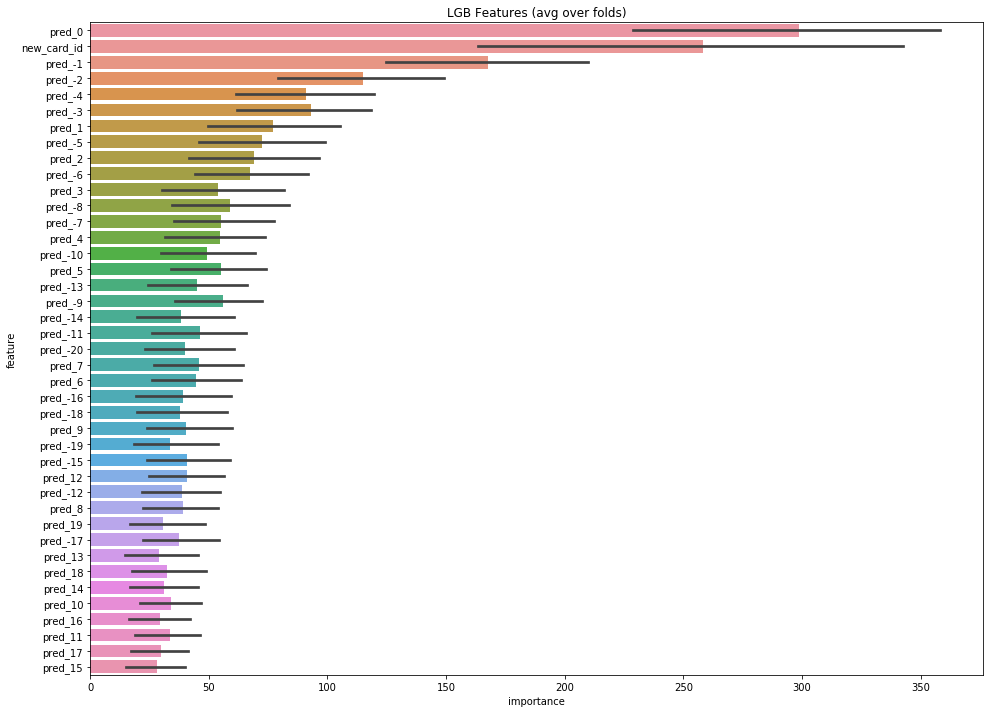

In [19]:
result_dict_lgb = train_model_classification(X=X, X_test=test, y=y, params=params, folds=folds, model_type='lgb', eval_metric='auc', plot_feature_importance=True,
                                                      verbose=100, early_stopping_rounds=300, n_estimators=5000, averaging='usual', groups=DT_M.loc[X.index])

In [20]:
import pickle
pickle.dump(result_dict_lgb, open(f'{p.working_folder}/results_dict_cat_work_6folds_20.pkl','wb'))

In [22]:
# test = test.sort_values('Date')
test['prediction'] = result_dict_lgb['prediction']

In [23]:
oof = pd.DataFrame(index=X.index)
oof['isFraud'] = result_dict_lgb['oof']
oof.to_csv(f'{p.working_folder}/oof_dynamic_cat_work_6folds_20.csv')

In [24]:
# folder_path = './data/'
sub = pd.read_csv(f'{data_path}/sample_submission.csv')
sub['isFraud'] = pd.merge(sub, test['prediction'], on='TransactionID')['prediction']
sub.to_csv(f'{p.working_folder}/submission_dynamic_cat_work_6folds_20.csv', index=False)